### Instalation Jupyter Notebook :
https://www.youtube.com/watch?v=UTqOXwAi1pE

# Simple Linear Regression 

In [ ]:
In this project, I will consider sales based on the marketing budget of 'TV, Radio, and Newspaper'.

In this notebook, we will build a linear regression model to predict 'Sales' using 'Total budget' as a predictor variable.

## Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # Model Machine Learning (Same as part Below)
from sklearn.metrics import mean_squared_error, r2_score # Evaluation Metrics Regression (Quantitative Evaluations)

In [4]:
# Checking versions
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("Anda dapat menggunakan version libraries yang ada dibagian ini")

Pandas version: 2.2.2
NumPy version: 1.26.4
Matplotlib version: 3.9.2
Scikit-learn version: 1.6.1
Anda dapat menggunakan version libraries yang ada dibagian ini


In [10]:
# Reading csv file from github repo
#kaggel ="https://www.kaggle.com/datasets/yasserh/advertising-sales-dataset"
#path = kagglehub.dataset_download("yasserh/advertising-sales-dataset")
advertising = pd.read_csv("Advertising Budget and Sales.csv")

Now, let's check the structure of the advertising dataset.

In [11]:
# Display the first 5 rows
advertising.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [12]:
# Display the last 5 rows
advertising.tail()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [13]:
# Let's check the columns
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [14]:
# Check the shape of the DataFrame (rows, columns)
advertising.shape

(200, 5)

In [15]:
# Let's look at some statistical information about the dataframe.
advertising.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [16]:
#In the data frame above, there are columns TV Ad Budget ($), Radio Ad Budget ($), and Newspaper Ad Budget ($). 
#Let's combine and change them into a single new column called Total Budget.
advertising['Total Budget'] = (
    advertising['TV Ad Budget ($)'] +
    advertising['Radio Ad Budget ($)'] +
    advertising['Newspaper Ad Budget ($)']
)
advertising.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($),Total Budget
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500,200.860500
std,57.879185,85.854236,14.846809,21.778621,5.217457,92.985181
min,1.000000,0.700000,0.000000,0.300000,1.600000,11.700000
25%,50.750000,74.375000,9.975000,12.750000,10.375000,123.550000
50%,100.500000,149.750000,22.900000,25.750000,12.900000,207.350000
75%,150.250000,218.825000,36.525000,45.100000,17.400000,281.125000
max,200.000000,296.400000,49.600000,114.000000,27.000000,433.600000


In [17]:
#Since we only need 2 columns, let's change the data frame structure so that we only have the 2 columns we need for this project.
advertising = advertising[['Total Budget', 'Sales ($)']]

# Let's look at some statistical information about the dataframe.
advertising.head()

,Total Budget,Sales ($)
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


In [38]:
# Display the first 5 rows
advertising.describe()

,Total Budget,Sales ($)
count,200.000000,200.000000
mean,200.860500,14.022500
std,92.985181,5.217457
min,11.700000,1.600000
25%,123.550000,10.375000
50%,207.350000,12.900000
75%,281.125000,17.400000
max,433.600000,27.000000


# Visualising Data Using Plot

<Axes: xlabel='Total Budget', ylabel='Sales ($)'>

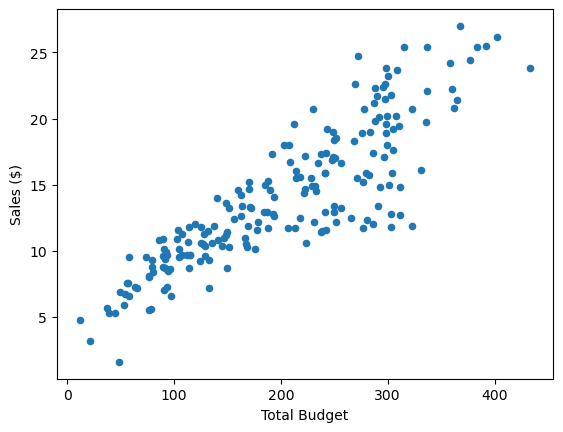

In [19]:
# Visualise the relationship between the features and the response using scatterplots

advertising.plot(x='Total Budget',y='Sales ($)',kind='scatter')

# Perfroming Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TotalBudget$

The $m$ values are called the model **coefficients** or **model parameters**.

### Generic Steps in Model Building using ```sklearn```

Before you read further, it is good to understand the generic structure of modeling using the scikit-learn library. Broadly, the steps to build any model can be divided as follows: 

## Preparing X and y

-  The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.
-  However, X can be a dataframe as Pandas is built over NumPy.

In [20]:
# Putting feature variable to X
X = advertising['Total Budget']

# Print the first 5 rows
X.head()

0    337.1
1    128.9
2    132.4
3    251.3
4    250.0
Name: Total Budget, dtype: float64

In [21]:
# Putting response variable to y
y = advertising['Sales ($)']

# Print the first 5 rows
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales ($), dtype: float64

## Splitting Data into Training and Testing Sets

In [22]:
#random_state is the seed used by the random number generator, it can be any integer.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=0000)

In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140,)
(140,)
(60,)
(60,)


In [24]:
#It is a general convention in scikit-learn that observations are rows, while features are columns. 
#This is needed only when you are using a single feature; in this case, 'TV'.

import numpy as np
# #Simply put, numpy.newaxis is used to increase the dimension of the existing array by one more dimension,
#X_train = X_train[:, np.newaxis]
#X_test = X_test[:, np.newaxis]

# JIKA ada Warning atau error dari code diatas, bisa gunakan code dibawah ini :

# Convert X_train and X_test to NumPy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Add new axis to the end
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 1)
(140,)
(60, 1)
(60,)


## Performing Linear Regression

In [27]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression()

## Coefficients Calculation

In [28]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

4.563993701626446
[0.04742327]


$y = 4.5639+ 0.0474 \times TV $<br>

Now, let's use this equation to predict our sales.

## Predictions

In [29]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)

In [30]:
type(y_pred)

numpy.ndarray

#### Computing RMSE and R^2 Values
RMSE is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model


In [31]:
y_test.shape # cheek the shape to generate the index for plot

(60,)

Text(0, 0.5, 'Sales')

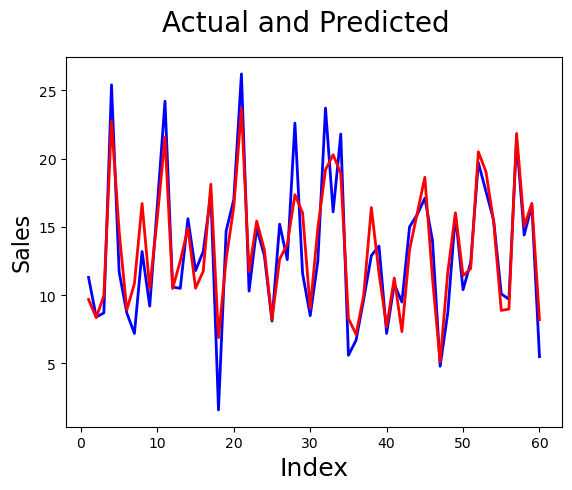

In [32]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,61,1)]         # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label

Text(0, 0.5, 'ytest-ypred')

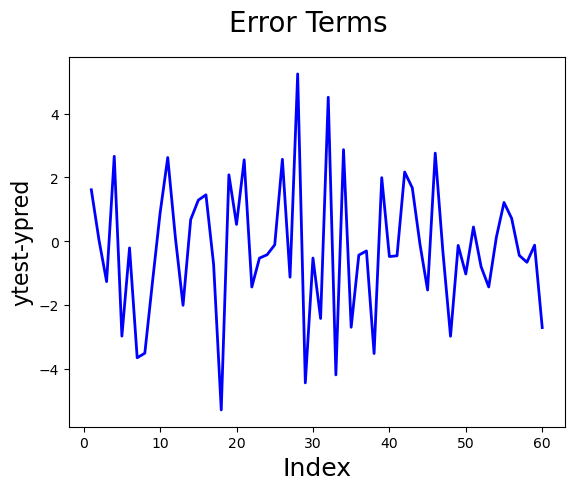

In [33]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [35]:
r_squared = r2_score(y_test, y_pred)

In [36]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 4.6298153283700465
r_square_value : 0.8305574657862769


In [26]:
# this mse =4.62 means that this model is not able to match the 4.62 percent of the values
# r2 means that your model is 83% is accurate on test data .

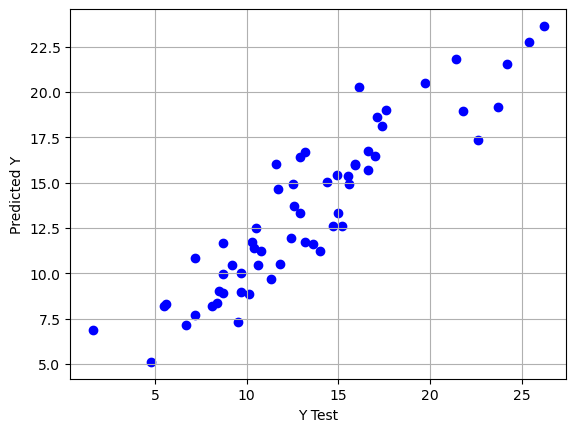

In [37]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()
